In [1]:
from utils.dataset import set_b_dataset

PROJECT_DIR = '/Users/kp/tf-gpu/SC1015-PROJECT/'
dataset = set_b_dataset(PROJECT_DIR)

for index in range(3):
    print(dataset.metadata['label'][index])
    print(dataset.metadata['peak-interval'][index])
    print(len(dataset.metadata['peak-interval'][index]))

KeyboardInterrupt: 

In [66]:
max_hrv_len = 0
for index in range(len(dataset.metadata)):
    hrv = dataset.metadata['peak-interval'][index]
    if (len(hrv) > max_hrv_len):
        max_hrv_len = max(max_hrv_len, len(hrv))
        
for index in range(len(dataset.metadata)):
    hrv = dataset.metadata['peak-interval'][index]
    hrv_len = len(dataset.metadata['peak-interval'][index])
    dataset.metadata['peak-interval'][index].extend([0]*(max_hrv_len-hrv_len))
    

In [101]:
X = np.array(dataset.metadata['peak-interval'].values.tolist())

In [106]:
X = X.reshape((-1, 1, max_hrv_len))

In [3]:
from tsai.all import *
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
import fnmatch
from sklearn.model_selection import train_test_split
device = torch.device("mps")

In [4]:
metadata = pd.read_csv("dataset/set_b.csv")

In [2]:
path = 'dataset/'
duration = 5
sr = 500

In [404]:
def stretch(data, rate):
    data = librosa.effects.time_stretch(data, rate)
    return data                 
def reshape_tsai(arr):
    return np.array(arr).reshape((-1, 1, duration*sr))
def label_encode(label):
    d = {'normal':0, 'extrastole':1, 'murmur':2}
    return d[label]
def augment_noise(sound, ratio):
    sound_copy = sound.copy()
    for i in range(ratio):
        sound_copy = sound_copy + [i + 0.025*np.random.randn(duration*sr) for i in sound]
    return sound_copy

In [405]:
def load_file_data (folder, file_names, duration=10, sr=22050):
    '''
        Extract MFCC feature from the Sound data from the audio data. 
        Augmentation of sound data by adding Noise, streaching and shifting.
        52 features are extracted from each audio data and used to train the model.
        
        Args: 
            dir_: Input directory to the Sound input file.
        
        Returns:
            data: list of features extracted from the sound file.
    '''
    input_length=sr*duration
    features = 52
    data = []
            
    for file_name in file_names:
        sound_file = folder+file_name
        X, sr = librosa.load(sound_file, sr=sr, duration=duration) 
        dur = librosa.get_duration(y=X, sr=sr)
        # pad audio file same duration
        if (dur < duration):
            print ("fixing audio lenght :", file_name)
            X = librosa.util.fix_length(X, input_length)
        data.append(X)
#         #extract normalized mfcc feature from data
#         mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=features).T,axis=0) 
#         feature = np.array(mfccs).reshape([-1,1])
#         data.append(feature)

#             stretch_data_1 = stretch (X, 0.8)
#             mfccs_stretch_1 = np.mean(librosa.feature.mfcc(y=stretch_data_1, sr=sr, n_mfcc=features).T,axis=0) 
#             feature_1 = np.array(mfccs_stretch_1).reshape([-1,1])
#             data.append(feature_1)

#             stretch_data_2 = stretch (X, 1.2) 
#             mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=stretch_data_2, sr=sr, n_mfcc=features).T,axis=0) 
#             feature_2 = np.array(mfccs_stretch_2).reshape([-1,1])
#             data.append(feature_2)
        
    return data

In [406]:
normal_files = fnmatch.filter(os.listdir(path + "set_b/"), 'normal*.wav')
normal_sounds = load_file_data(folder=path + "set_b/", file_names=normal_files, duration=duration, sr = sr)
normal_labels = [0 for items in normal_sounds]

extrastole_files = fnmatch.filter(os.listdir(path + "set_b/"), 'extrastole*.wav')
extrastole_sounds = load_file_data(folder=path + "set_b/", file_names=extrastole_files, duration=duration, sr = sr)
extrastole_labels = [1 for items in extrastole_sounds]
ratio_extrastole = len(normal_labels)//len(extrastole_labels)

murmur_files = fnmatch.filter(os.listdir(path + "set_b/"), 'murmur*.wav')
murmur_sounds = load_file_data(folder=path + "set_b/", file_names=murmur_files, duration=duration, sr = sr)
murmur_labels = [2 for items in murmur_sounds]
ratio_murmur = len(normal_labels)//len(murmur_labels)

fixing audio lenght : normal__232_1308748524018_D1.wav
fixing audio lenght : normal_noisynormal_173_1307973611151_C1.wav
fixing audio lenght : normal__210_1308162935880_D2.wav
fixing audio lenght : normal__177_1307989650056_B.wav
fixing audio lenght : normal__208_1308159994503_C.wav
fixing audio lenght : normal__210_1308162935880_D1.wav
fixing audio lenght : normal__215_1308245664733_C.wav
fixing audio lenght : normal_noisynormal_189_1308075231945_A1.wav
fixing audio lenght : normal__129_1306344506305_B1.wav
fixing audio lenght : normal_noisynormal_285_1311169246969_C.wav
fixing audio lenght : normal__175_1307987962616_B.wav
fixing audio lenght : normal__143_1306763822290_C.wav
fixing audio lenght : normal_noisynormal_167_1307111318050_A1.wav
fixing audio lenght : normal__147_1306523973811_C.wav
fixing audio lenght : normal_noisynormal_159_1307018640315_A1.wav
fixing audio lenght : normal__238_1309194586293_B.wav
fixing audio lenght : normal__230_1308595300880_C.wav
fixing audio lenght

fixing audio lenght : normal__126_1306777102824_C.wav
fixing audio lenght : normal__227_1308594233667_B.wav
fixing audio lenght : normal__133_1306759619127_B.wav
fixing audio lenght : normal__227_1308594233667_C.wav
fixing audio lenght : normal_noisynormal_125_1306332456645_D.wav
fixing audio lenght : normal_noisynormal_154_1306935608852_C.wav
fixing audio lenght : normal_noisynormal_133_1306759619127_D1.wav
fixing audio lenght : normal__214_1308245489717_A.wav
fixing audio lenght : normal__190_1308076920011_D.wav
fixing audio lenght : normal__290_1311182875320_A.wav
fixing audio lenght : normal__278_1311163365896_A.wav
fixing audio lenght : normal__133_1306759619127_A.wav
fixing audio lenght : normal_noisynormal_141_1306520154450_B1.wav
fixing audio lenght : normal__167_1307111318050_C.wav
fixing audio lenght : normal_noisynormal_159_1307018640315_B.wav
fixing audio lenght : extrastole__224_1308337157445_B.wav
fixing audio lenght : extrastole__148_1306768801551_B.wav
fixing audio leng

In [387]:
# normal_sounds = normal_sounds[0:46]
# normal_labels = normal_labels[0:46]
# murmur_sounds = murmur_sounds[0:46]
# murmur_labels = murmur_labels[0:46]

In [407]:
X_train, X_test, y_train, y_test = [], [], [], []
for X, y, ratio in zip([normal_sounds, extrastole_sounds, murmur_sounds], [normal_labels, extrastole_labels, murmur_labels], [0, ratio_extrastole, ratio_murmur]):
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train.extend(augment_noise(train_X, ratio))
    X_test.extend(test_X)
    y_train.extend(train_y*(ratio + 1))
    y_test.extend(test_y)

In [408]:
len(y_test)

93

In [409]:
print('normal:', y_train.count(0))
print('extrastole:', y_train.count(1))
print('murmur:', y_train.count(2))

normal: 256
extrastole: 252
murmur: 304


In [410]:
y_test.count(0)

64

In [306]:
# extrastole_labels = extrastole_labels *(ratio_extrastole+1)
# murmur_labels = murmur_labels *(ratio_murmur+1)

In [313]:
# extrastole_sounds = augment_noise(extrastole_sounds, ratio_extrastole)
# murmur_sounds = augment_noise(murmur_sounds, ratio_murmur)

In [411]:
# normal_sounds = reshape_tsai(normal_sounds)
# extrastole_sounds = reshape_tsai(extrastole_sounds)
# murmur_sounds = reshape_tsai(murmur_sounds)

X_train = reshape_tsai(X_train)
X_test = reshape_tsai(X_test)

In [412]:
X = np.concatenate((normal_sounds, extrastole_sounds, murmur_sounds), axis=0)
y = normal_labels + extrastole_labels + murmur_labels

In [413]:
print(X_train.shape)
print(len(y_train))

(812, 1, 2500)
812


In [234]:
# window_length = 500
# stride = None
# horizon = 1
# print('input shape:', X[0].shape)

# X_sliced = SlidingWindow(window_length, stride=stride, horizon=horizon)(X[0])[0]
# y_sliced = [y[0]] * X_sliced.shape[0]
# for i in range(1, X.shape[0]):
#     temp = SlidingWindow(window_length, stride=stride, horizon=horizon)(X[i])[0]
#     X_sliced = np.concatenate((X_sliced, temp), axis=0)
#     y_sliced = y_sliced + [y[i]] * temp.shape[0]

input shape: (2,)


AttributeError: 'NoneType' object has no attribute 'shape'

In [113]:
y = [label_encode(i) for i in dataset.metadata['label'].values.tolist()]

In [414]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X, y, splits = combine_split_data([X_train, X_test], [y_train, y_test])

In [415]:
splits

((#812) [0,1,2,3,4,5,6,7,8,9...],
 (#93) [812,813,814,815,816,817,818,819,820,821...])

In [416]:
X.shape

(905, 1, 2500)

epoch,train_loss,valid_loss,accuracy,time
0,0.902787,1.045748,0.677419,00:10
1,0.765355,0.753452,0.720430,00:06
2,0.676962,0.706113,0.763441,00:06
3,0.623128,0.658253,0.774194,00:06
4,0.606730,1.132651,0.645161,00:06
5,0.575112,0.927333,0.591398,00:06
6,0.551921,1.107976,0.698925,00:06
7,0.533307,0.723745,0.752688,00:06
8,0.519204,5.799304,0.311828,00:06
9,0.499570,1.047350,0.774194,00:06


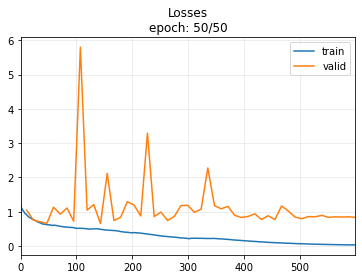

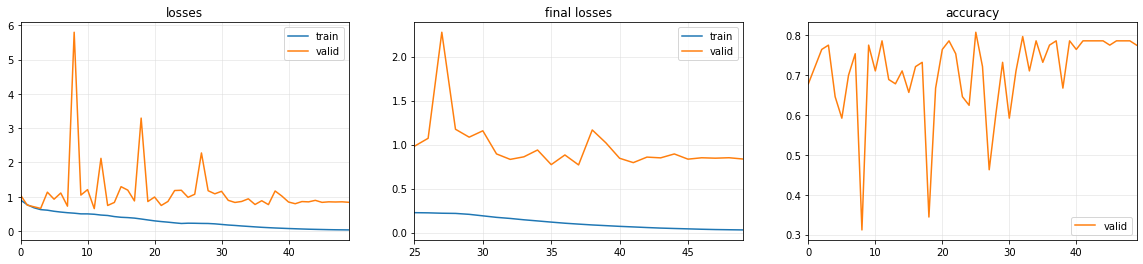

In [418]:
tfms = [None, TSClassification()]
batch_tfms = TSStandardize()     
clf = TSClassifier(X, y, splits=splits, bs=[64, 128], path='models', arch="InceptionTimePlus", tfms=tfms, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
clf.fit_one_cycle(50, 5e-3)
clf.export("clf.pkl") 

In [397]:
tfms  = [None, TSClassification()] # TSClassification == Categorize
batch_tfms = TSStandardize()
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=[16, 32])

In [398]:
model = build_ts_model(InceptionTime, dls=dls)
learn = Learner(dls, model, metrics=accuracy)

SuggestedLRs(valley=0.0004786300996784121)

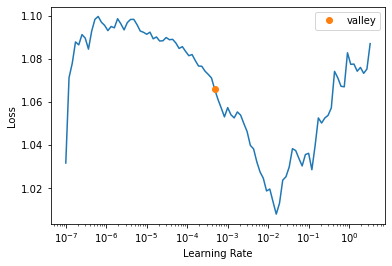

In [399]:
learn.lr_find()

In [400]:
bs = 16
print(X.shape)
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[bs, bs*2])

archs = [(FCN, {}), (ResNet, {}), (ResCNN, {}), 
         (LSTM, {'n_layers':1, 'bidirectional': False}), (LSTM, {'n_layers':2, 'bidirectional': False}), (LSTM, {'n_layers':3, 'bidirectional': False}),
         (LSTM_FCN, {}), (LSTM_FCN, {'shuffle': False}), (InceptionTime, {}), (OmniScaleCNN, {}), (mWDN, {'levels': 4})]

results = pd.DataFrame(columns=['arch', 'hyperparams', 'total params', 'train loss', 'valid loss', 'accuracy', 'time'])
for i, (arch, k) in enumerate(archs):
    model = create_model(arch, dls=dls, **k)
    print(model.__class__.__name__)
    learn = Learner(dls, model,  metrics=accuracy)
    start = time.time()
    learn.fit_one_cycle(50, 5e-4)
    elapsed = time.time() - start
    vals = learn.recorder.values[-1]
    results.loc[i] = [arch.__name__, k, count_parameters(model), vals[0], vals[1], vals[2], int(elapsed)]
    results.sort_values(by='accuracy', ascending=False, kind='stable', ignore_index=True, inplace=True)
    clear_output()
    display(results)

,arch,hyperparams,total params,train loss,valid loss,accuracy,time
0,FCN,{},264451,0.870233,0.820619,0.678571,19
1,ResCNN,{},256388,0.687236,0.771180,0.678571,21
2,LSTM_FCN,{'shuffle': False},305951,0.873451,0.824525,0.678571,60
3,LSTM_FCN,{},1305551,0.636256,0.829865,0.642857,19
4,ResNet,{},478595,0.439231,0.786764,0.607143,35
5,InceptionTime,{},388739,0.240436,0.832289,0.607143,49
6,LSTM,"{'n_layers': 1, 'bidirectional': False}",41503,1.097131,1.109813,0.250000,49
7,LSTM,"{'n_layers': 2, 'bidirectional': False}",122303,1.097553,1.106863,0.250000,84
8,LSTM,"{'n_layers': 3, 'bidirectional': False}",203103,1.097554,1.106585,0.250000,120


OmniScaleCNN


epoch,train_loss,valid_loss,accuracy,time
0,1.089280,1.093561,0.357143,01:45
1,1.064474,1.062740,0.392857,01:44
2,1.057479,1.057697,0.392857,01:36
3,1.049285,1.056876,0.392857,01:46
4,1.037882,1.034906,0.428571,01:45
5,1.025061,1.011824,0.500000,01:44
6,1.008419,0.973130,0.535714,01:48
7,0.989664,0.945820,0.500000,01:48
8,0.981576,0.985727,0.535714,01:43
9,0.966709,0.985093,0.464286,01:58


KeyboardInterrupt: 

In [ ]:
# from tsai.all import *

# #X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
# X, y, splits = combine_split_data([X_train_extra, X_test], [y_train_extra, y_test])

# bs = 32
# tfms  = [None, [Categorize()]]
# dsets = TSDatasets(X, y, tfms=tfms, splits=splits)
# dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[bs, bs*2])

# archs = [(FCN, {}), (ResNet, {}), (ResCNN, {}), 
#          (LSTM, {'n_layers':1, 'bidirectional': False}), (LSTM, {'n_layers':3, 'bidirectional': False}),
#          (LSTM_FCN, {}), (InceptionTime, {}), (OmniScaleCNN, {}), (mWDN, {'levels': 4})]

# confusion_plot = []
# results = pd.DataFrame(columns=['arch', 'hyperparams', 'total params', 'train loss', 'valid loss', 'accuracy', 'time'])
# for i, (arch, k) in enumerate(archs):
#     model = create_model(arch, dls=dls, **k)
#     print(model.__class__.__name__)
#     learn = Learner(dls, model,  metrics=accuracy)
#     start = time.time()
#     learn.fit_one_cycle(50, 2e-5)
#     elapsed = time.time() - start
#     vals = learn.recorder.values[-1]
#     results.loc[i] = [arch.__name__, k, count_parameters(model), vals[0], vals[1], vals[2], int(elapsed)]
#     results.sort_values(by='accuracy', ascending=False, kind='stable', ignore_index=True, inplace=True)
#     learn.plot_confusion_matrix()
#     #probas, target, preds = learn.get_X_preds(X[splits[1]], np.array(y)[splits[1]], with_decoded=True)
#     #prediction.append([probas, target, preds, arch.__name__])
#     clear_output()
#     display(results)